In [1]:
# Import required libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [3]:
# Read the  dataset
df = pd.read_csv("../dataset/Train.csv", low_memory=False)
variable_def = pd.read_csv("../dataset/Variable_Definitions.csv", low_memory=False)

In [4]:
# Print basic information about raw datasets
print(f"Dataset shape: {df.shape}")

Dataset shape: (8908, 16)


In [5]:
#Check data types and structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2   I/O Data Bytes            8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent                8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [6]:
for feature, description in variable_def.values:
  print(f'{feature} :  {description}')

I/O Data Operations :  Speed at which the process is issuing read and write I/O operations
I/O Data Bytes :  Speed at which the process is reading and writing bytes in I/O operations
Number of subprocesses :  Number of sub-processes that are currently active in a parent process
Time on processor :  The total time, in seconds, that a process has been running
Disk Reading/sec :  Speed of disk reading operations
Disc Writing/sec :  Speed of writing operations to disk
Confirmed byte radius :  The ratio of Memory/Bytes committed and Memory/Confirmation limit
Pages Read/sec :  Speed rate at which the disk was read in order to resolve hard page errors
Pages Input/sec :  Speed at which pages are written to disk to free up space in physical memory
Page Errors/sec :  This is the average number of pages with faults per second
Bytes Sent :  The rate at which bytes leave the browser’s HTTP requests
Received Bytes (HTTP) :  Speed of bytes arriving to the browser’s HTTP responses
Network packets sent

In [7]:
# Summary statistics for numerical columns
print(df.describe().T)

                           count           mean            std        min         25%          50%           75%           max
I/O Data Operations       8908.0      36.429205      75.884647   0.000000    1.394404    11.613803     34.494953  1.795316e+03
I/O Data Bytes            8908.0  113556.435854  489684.616342   0.000000  813.631825  4930.481627  39403.570772  4.677280e+06
Number of subprocesses    8908.0      29.811900       5.691411   1.000000   27.000000    28.000000     30.000000  5.100000e+01
Time on processor         8908.0       0.496405       1.593626   0.000000    0.000000     0.034734      0.451350  2.524615e+01
Disk Reading/sec          8908.0       5.353260      19.286690   0.044459    0.755629     1.711077      5.845619  1.064819e+03
Disc Writing/sec          8908.0       1.046153      15.667814   0.000000    0.000000     0.000000      0.022229  8.315039e+02
Bytes Sent                8908.0     559.546628    1939.745234   1.197890   33.843800    67.366295    221.31481

In [8]:
df.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [9]:
#check for missing values
df.isnull().sum()

ID                          0
I/O Data Operations         0
I/O Data Bytes              0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent                  0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
Label                       0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
# Class distribution
print(df['Label'].value_counts())

Label
0    6504
1    2404
Name: count, dtype: int64


In [12]:
# Calculate the correlation coefficients between all columns and the label column
correlations = df.drop('ID', axis=1).corr()['Label']
print(correlations.sort_values(ascending=False))

Label                       1.000000
I/O Data Operations         0.099165
Received Bytes (HTTP)       0.052535
Network packets received    0.045522
Network packets sent        0.041176
Pages Read/sec              0.020558
Bytes Sent                  0.009655
Disc Writing/sec           -0.002698
Pages Input/sec            -0.024041
Time on processor          -0.029156
I/O Data Bytes             -0.050343
Disk Reading/sec           -0.053590
Page Errors/sec            -0.117415
Confirmed byte radius      -0.174451
Number of subprocesses     -0.185420
Name: Label, dtype: float64


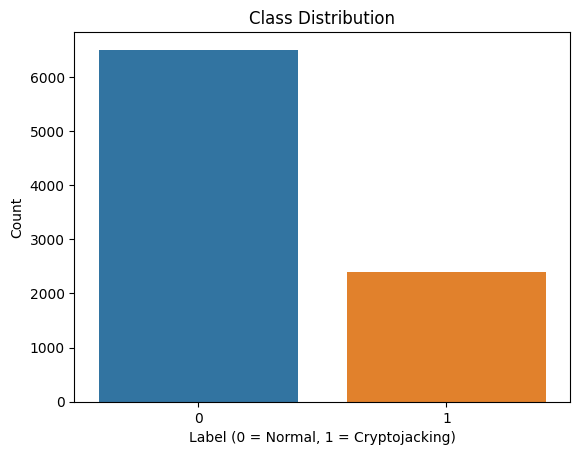

In [13]:
# Class Distribution Plot
sns.countplot(x='Label', data=df, hue='Label', legend=False)
plt.title('Class Distribution')
plt.xlabel('Label (0 = Normal, 1 = Cryptojacking)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Label'>

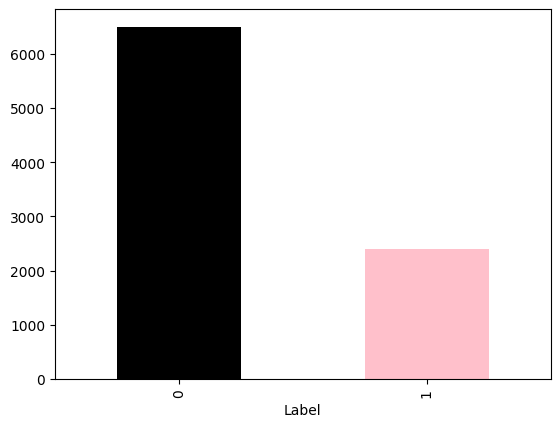

In [14]:
df["Label"].value_counts().plot(kind="bar", color=['black', 'pink'])

In [6]:
df_no_id = df.drop('ID', axis=1)

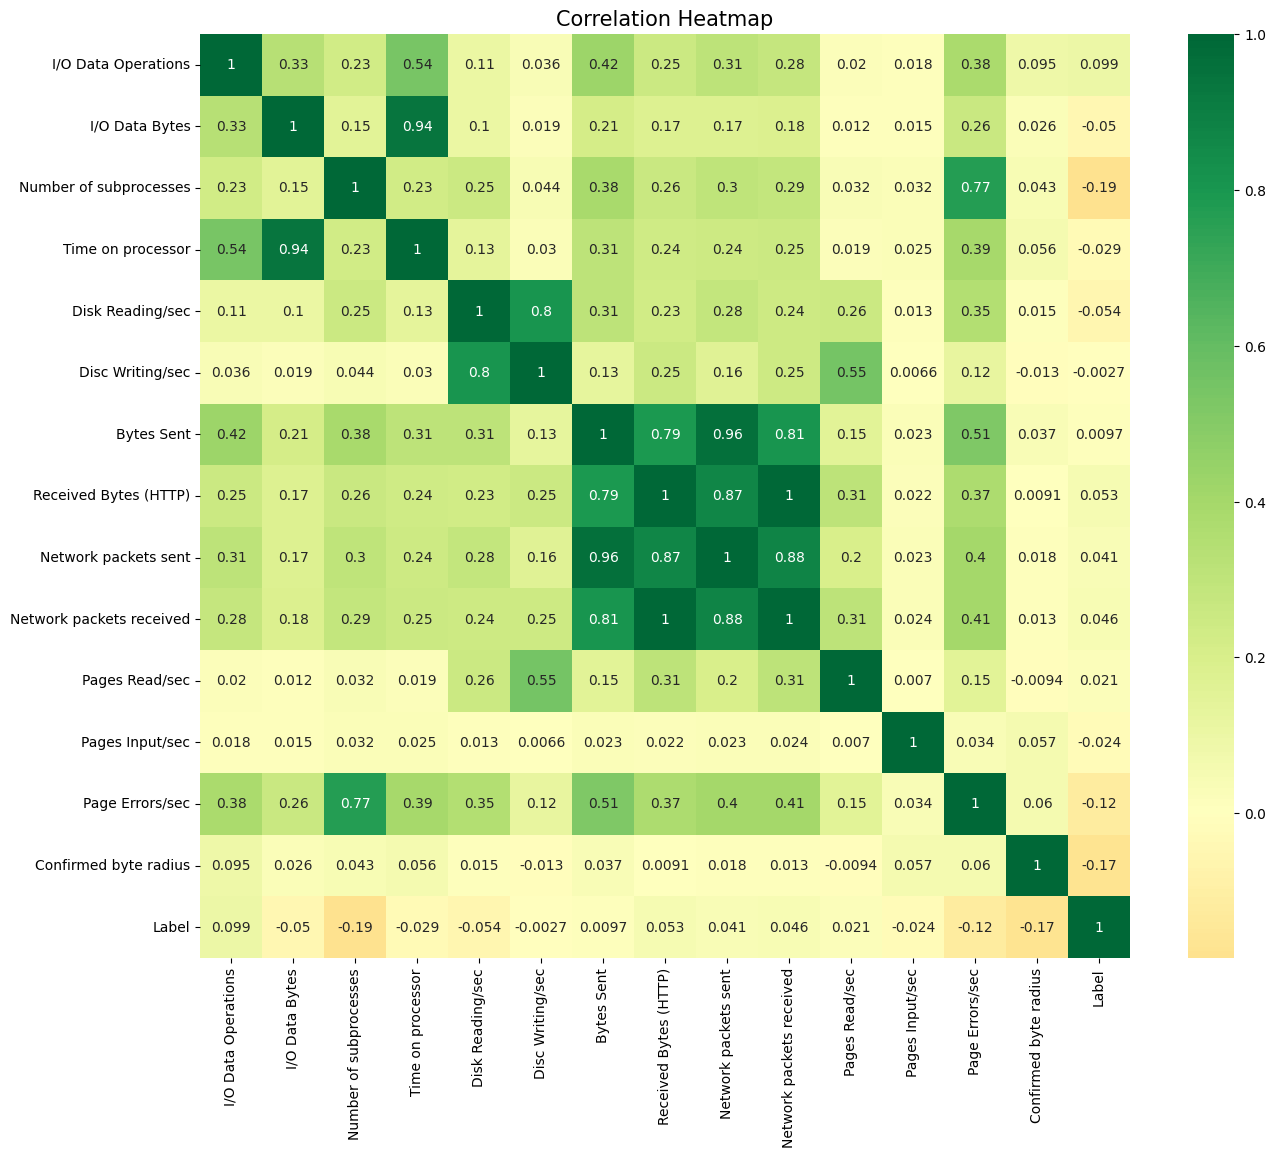

In [16]:
# Plotting a heatmap to show correlations between variables
plt.figure(figsize = (15, 12))
sns.heatmap(df_no_id.corr(), cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

In [17]:
# Check for outliers using IQR method
numeric_cols = df.select_dtypes(include=np.number).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers

print("Outlier counts per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier counts per column:
I/O Data Operations: 1029
I/O Data Bytes: 1499
Number of subprocesses: 1113
Time on processor: 590
Disk Reading/sec: 1186
Disc Writing/sec: 1979
Bytes Sent: 1678
Received Bytes (HTTP): 1882
Network packets sent: 1544
Network packets received: 1758
Pages Read/sec: 1708
Pages Input/sec: 47
Page Errors/sec: 1668
Confirmed byte radius: 2
Label: 0


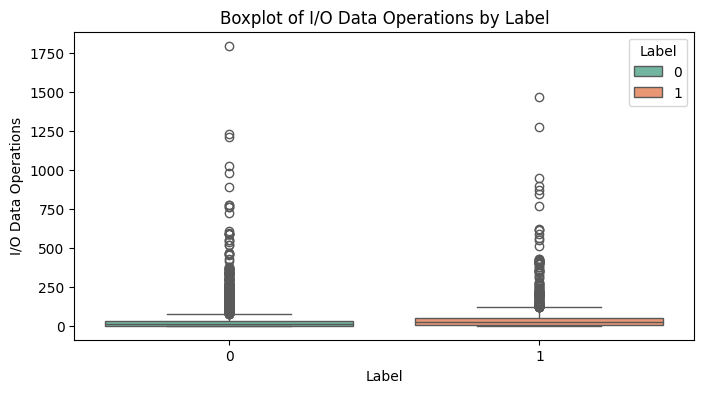

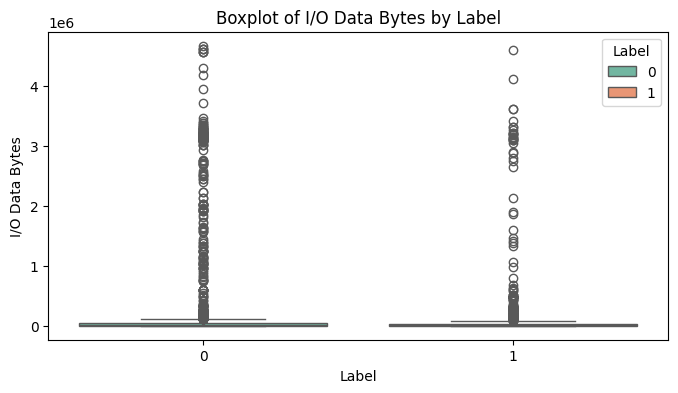

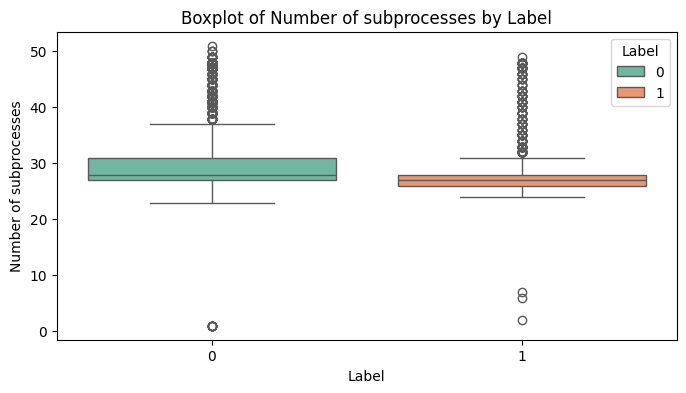

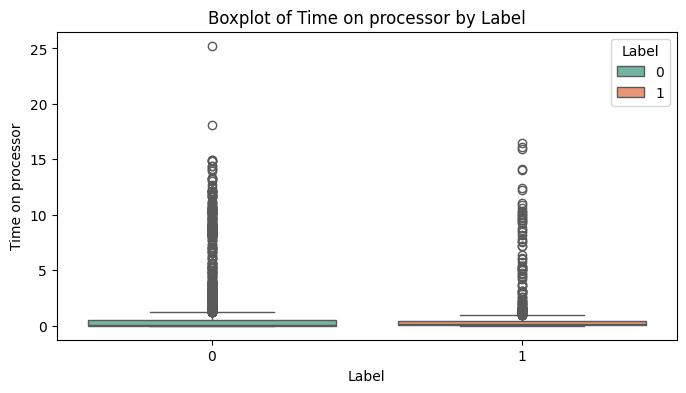

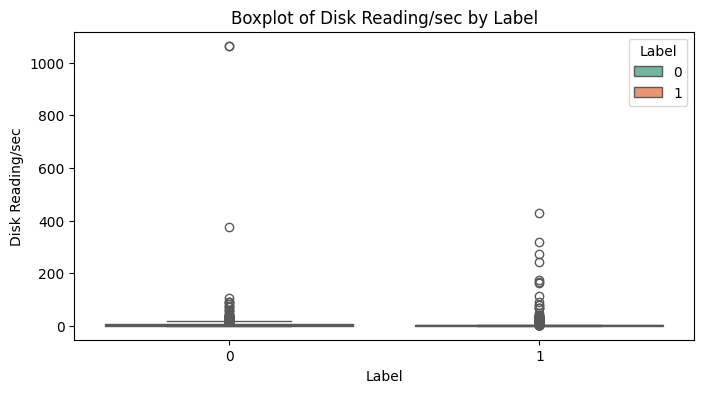

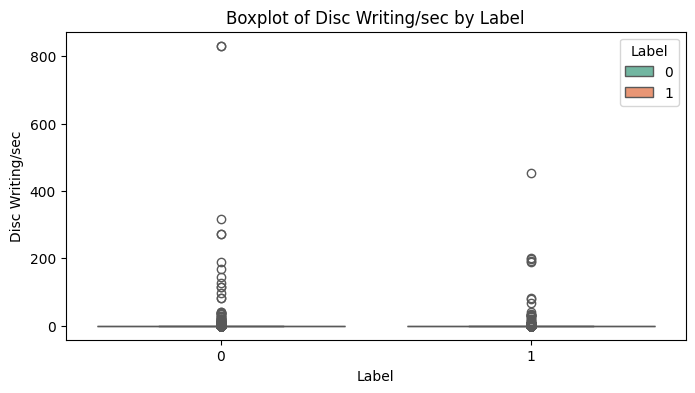

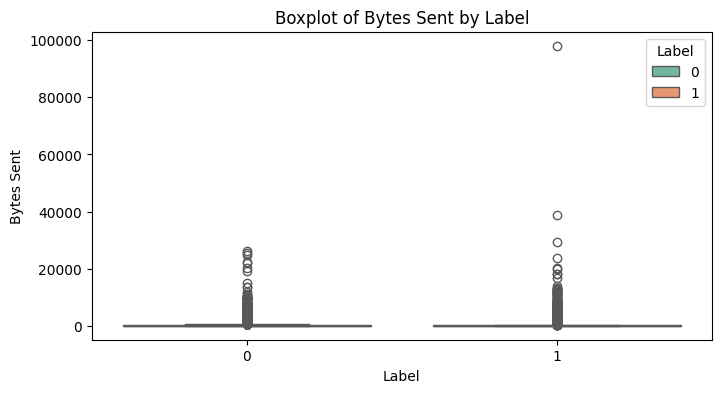

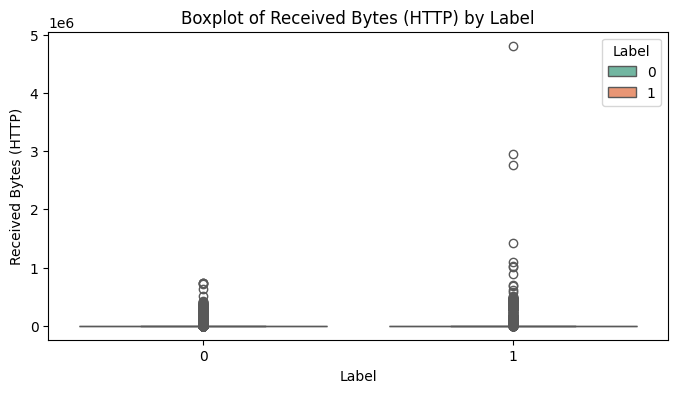

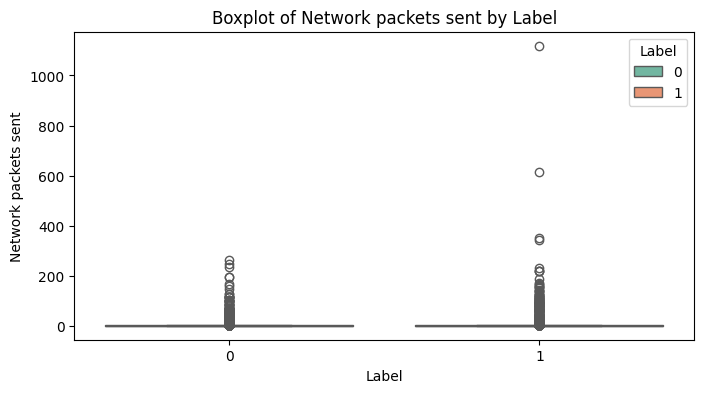

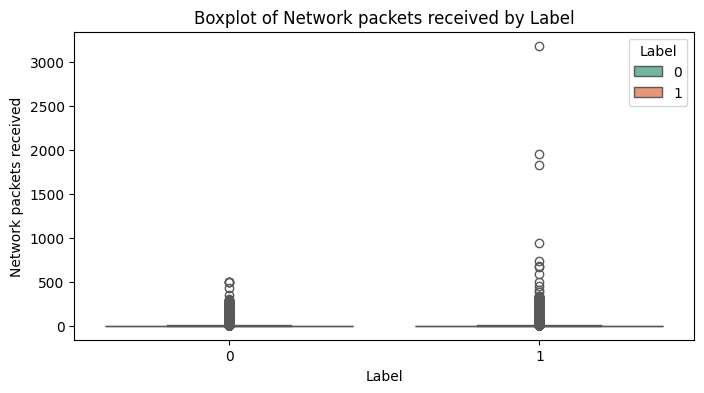

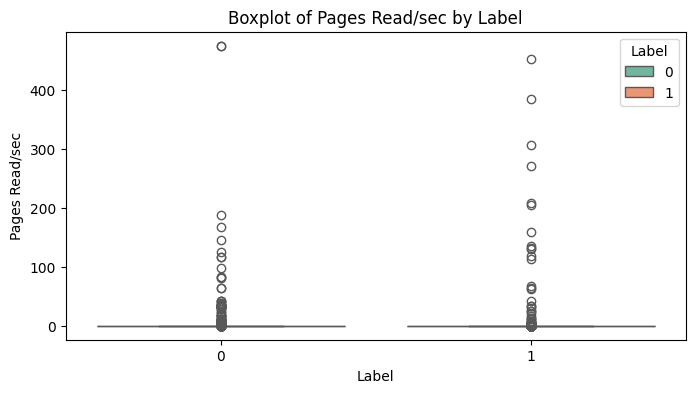

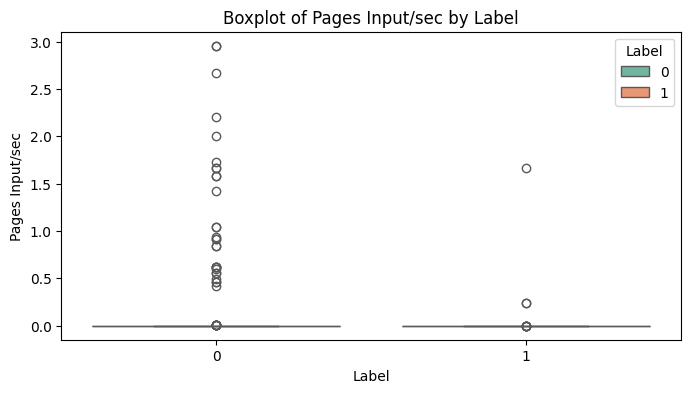

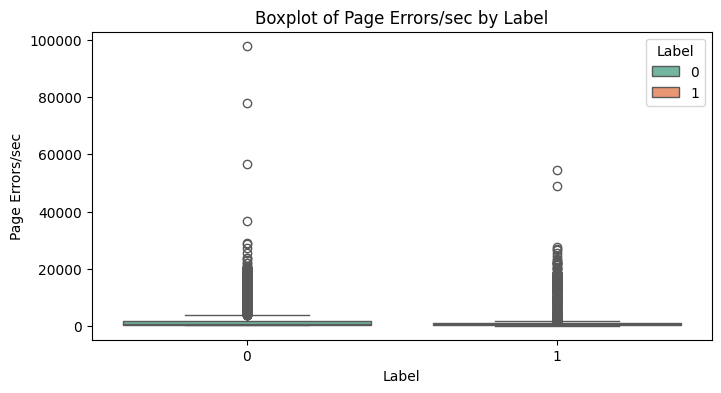

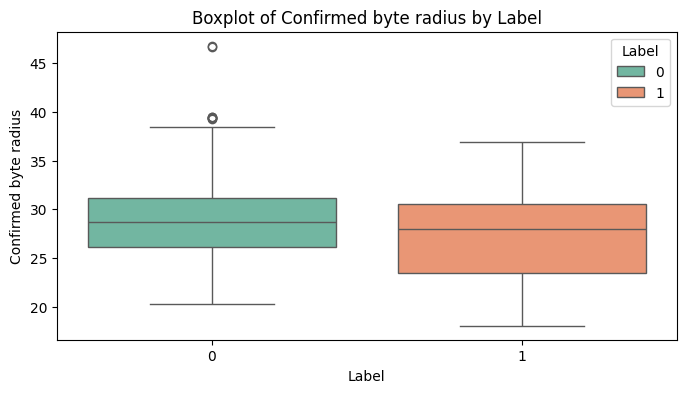

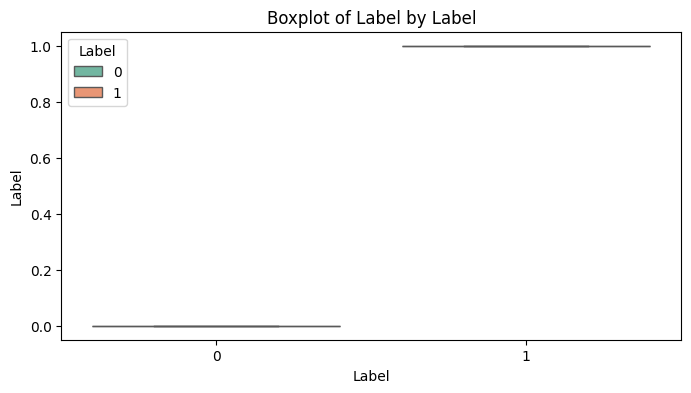

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Label', y=col, data=df, hue='Label', palette='Set2')
    plt.title(f'Boxplot of {col} by Label')
    plt.show()

In [8]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['ID', 'Label'])
y = df['Label']

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Combine back into a DataFrame
df_balanced = pd.DataFrame(X_smote, columns=X.columns)
df_balanced['Label'] = y_smote

print("SMOTE balancing complete. New class distribution:")
print(df_balanced['Label'].value_counts())
print("Dataset shape after SMOTE:", df_balanced.shape)

SMOTE balancing complete. New class distribution:
Label
1    6504
0    6504
Name: count, dtype: int64
Dataset shape after SMOTE: (13008, 15)


<Axes: xlabel='Label'>

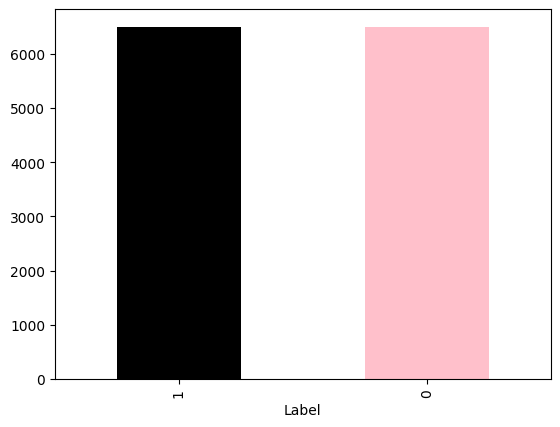

In [18]:
df_balanced["Label"].value_counts().plot(kind="bar", color=['black', 'pink'])

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
features = df_balanced.drop(columns=['Label']).columns

scaler = StandardScaler()
df_scaled = df_balanced.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

print(df_scaled.head())

   I/O Data Operations  I/O Data Bytes  Number of subprocesses  Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent  Received Bytes (HTTP)  Network packets sent  Network packets received  Pages Read/sec  Pages Input/sec  Page Errors/sec  Confirmed byte radius  Label
0             0.974357       -0.215765                -0.22868          -0.030309          0.080787          1.398072   -0.251507              -0.169874             -0.199393                 -0.180848        1.743919        -0.044836        -0.311203              -0.237112      1
1            -0.337117       -0.212700                -0.22868          -0.222985          0.037433         -0.069885   -0.269551              -0.170192             -0.208252                 -0.181910       -0.080014        -0.044836        -0.292326               0.532111      0
2            -0.520978       -0.223845                -0.22868          -0.315829         -0.179761         -0.069885   -0.275203              -0.170345     

In [19]:
import joblib

# Save the scaler for use in Flask app
joblib.dump(scaler, '../models/scaler.pkl')
print("✅ Scaler saved to ../models/scaler.pkl")

✅ Scaler saved to ../models/scaler.pkl


In [15]:
from sklearn.model_selection import train_test_split

# First split: train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# Now: 60% train, 20% val, 20% test
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (7804, 14)
Validation shape: (2602, 14)
Test shape: (2602, 14)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42,max_depth=10)
rf.fit(X_train, y_train)

# Training predictions
rf_train_pred = rf.predict(X_train)
print("Random Forest Training Classification Report:\n", classification_report(y_train, rf_train_pred))

# Validation predictions
rf_val_pred = rf.predict(X_val)
print("Random Forest Validation Classification Report:\n", classification_report(y_val, rf_val_pred))

# Testing predictions
rf_test_pred = rf.predict(X_test)
print("Random Forest Testing Classification Report:\n", classification_report(y_test, rf_test_pred))

Random Forest Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3902
           1       0.97      0.98      0.97      3902

    accuracy                           0.97      7804
   macro avg       0.97      0.97      0.97      7804
weighted avg       0.97      0.97      0.97      7804

Random Forest Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1301
           1       0.95      0.96      0.95      1301

    accuracy                           0.95      2602
   macro avg       0.95      0.95      0.95      2602
weighted avg       0.95      0.95      0.95      2602

Random Forest Testing Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1301
           1       0.95      0.96      0.96      1301

    accuracy                           0

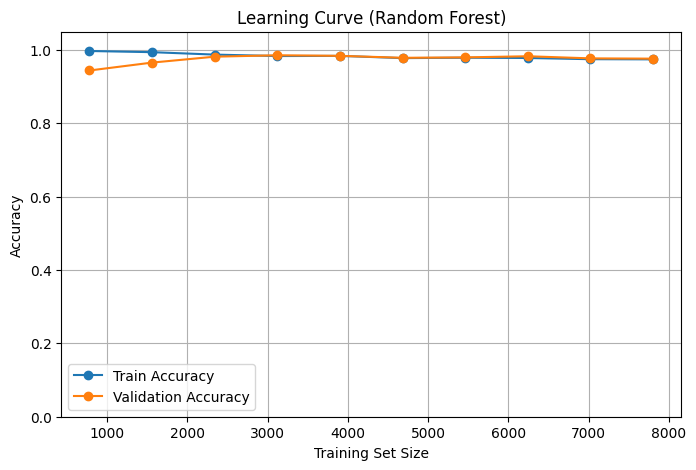

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(random_state=42,max_depth=10),
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=[(np.arange(len(X_train)), np.arange(len(X_val)))],  # Use your validation set
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Train Accuracy')
plt.plot(train_sizes, val_scores_mean, marker='o', label='Validation Accuracy')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split features and target from the scaled balanced data
X = df_scaled.drop(columns=['Label'])
y = df_scaled['Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (10406, 14)
Test shape: (2602, 14)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Training accuracy for Random Forest
rf_train_pred = rf.predict(X_train)
print("Random Forest Training Classification Report:\n", classification_report(y_train, rf_train_pred))

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5203
           1       1.00      1.00      1.00      5203

    accuracy                           1.00     10406
   macro avg       1.00      1.00      1.00     10406
weighted avg       1.00      1.00      1.00     10406

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1301
           1       0.98      0.98      0.98      1301

    accuracy                           0.98      2602
   macro avg       0.98      0.98      0.98      2602
weighted avg       0.98      0.98      0.98      2602



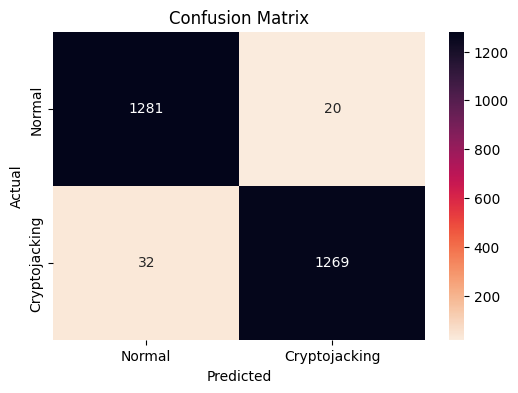

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import joblib

# Save Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')

# To load it later:
# rf_loaded = joblib.load('random_forest_model.pkl')

['random_forest_model.pkl']

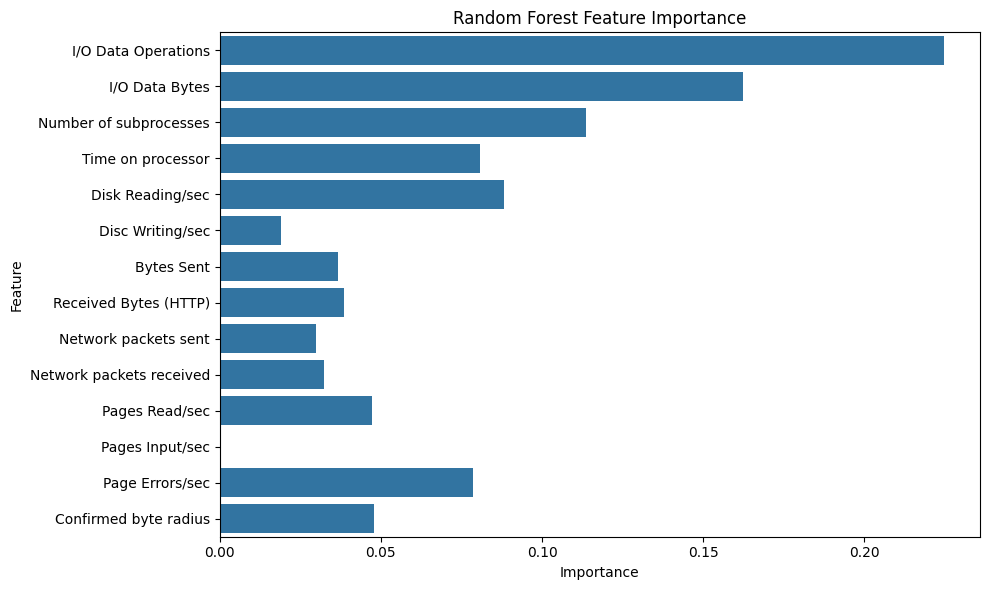

In [86]:
# Random Forest Feature Importance
rf_importance = rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance, y=X_train.columns)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Training accuracy for Decision Tree
dt_train_pred = dt.predict(X_train)
print("Decision Tree Training Classification Report:\n", classification_report(y_train, dt_train_pred))

print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5203
           1       1.00      1.00      1.00      5203

    accuracy                           1.00     10406
   macro avg       1.00      1.00      1.00     10406
weighted avg       1.00      1.00      1.00     10406

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1301
           1       0.96      0.95      0.96      1301

    accuracy                           0.96      2602
   macro avg       0.96      0.96      0.96      2602
weighted avg       0.96      0.96      0.96      2602



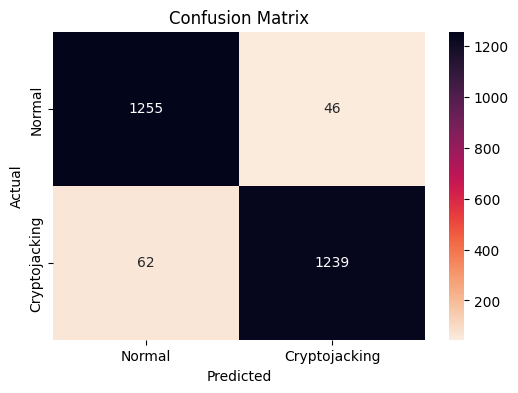

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', xticklabels=['Normal', 'Cryptojacking'], yticklabels=['Normal', 'Cryptojacking'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
import joblib

# Save Decision Tree model
joblib.dump(dt, 'decision_tree_model.pkl')

# To load it later:
# dt_loaded = joblib.load('decision_tree_model.pkl')

['decision_tree_model.pkl']

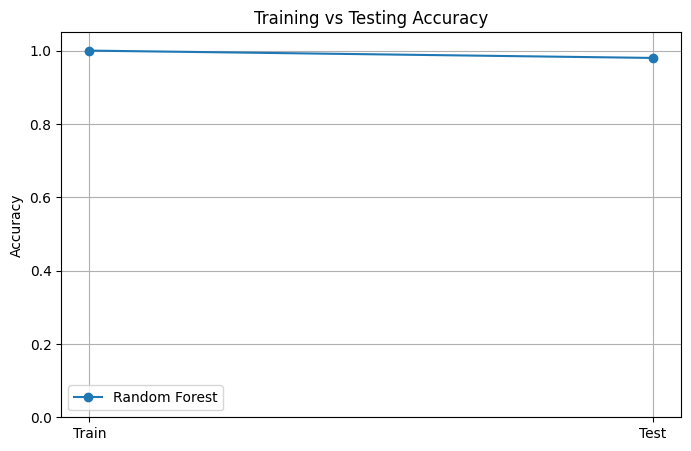

In [14]:
import matplotlib.pyplot as plt

# Calculate accuracy for both train and test sets
rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)

# Plot accuracy curves
plt.figure(figsize=(8, 5))
plt.plot(['Train', 'Test'], [rf_train_acc, rf_test_acc], marker='o', label='Random Forest')
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Load test data
df_test = pd.read_csv("../dataset/Test.csv", low_memory=False)

# Preprocess test data (drop ID, scale features)
X_test_final = df_test.drop(columns=['ID'])
ids = df_test['ID']

# Use the same scaler as training
X_test_final_scaled = scaler.transform(X_test_final)

# Decision Tree predictions
dt_pred_final = dt.predict(X_test_final_scaled)
df_test['DT_Prediction'] = dt_pred_final

# Random Forest predictions
rf_pred_final = rf.predict(X_test_final_scaled)
df_test['RF_Prediction'] = rf_pred_final


# Save predictions to CSV
df_test[['ID', 'DT_Prediction', 'RF_Prediction']].to_csv('Test_Predictions.csv', index=False)

c:\Users\zoroa\miniconda3\envs\cryptojack\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\zoroa\miniconda3\envs\cryptojack\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


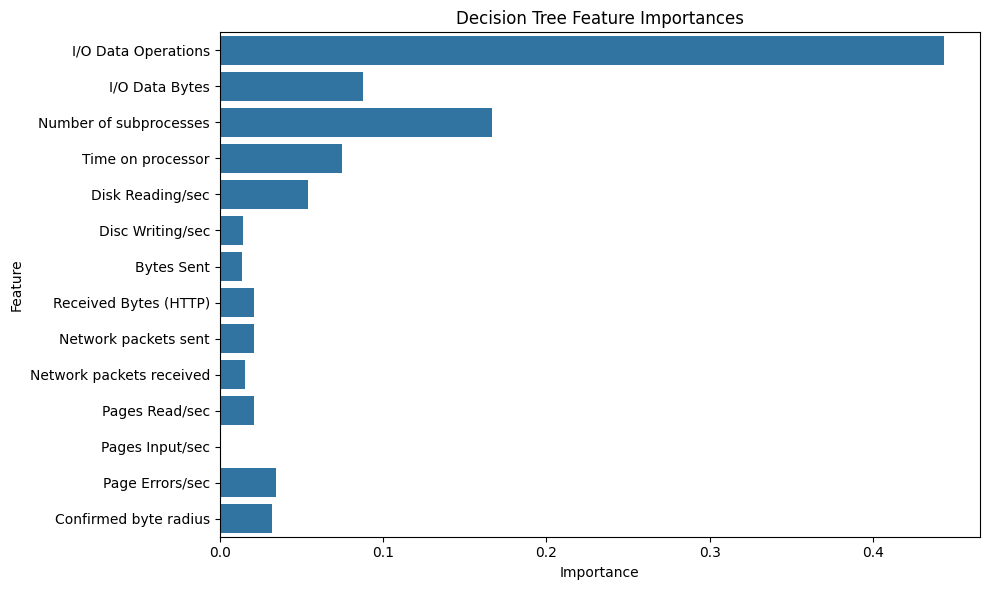

In [25]:
importances = dt.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      1301
           1       0.68      0.69      0.69      1301

    accuracy                           0.68      2602
   macro avg       0.68      0.68      0.68      2602
weighted avg       0.68      0.68      0.68      2602



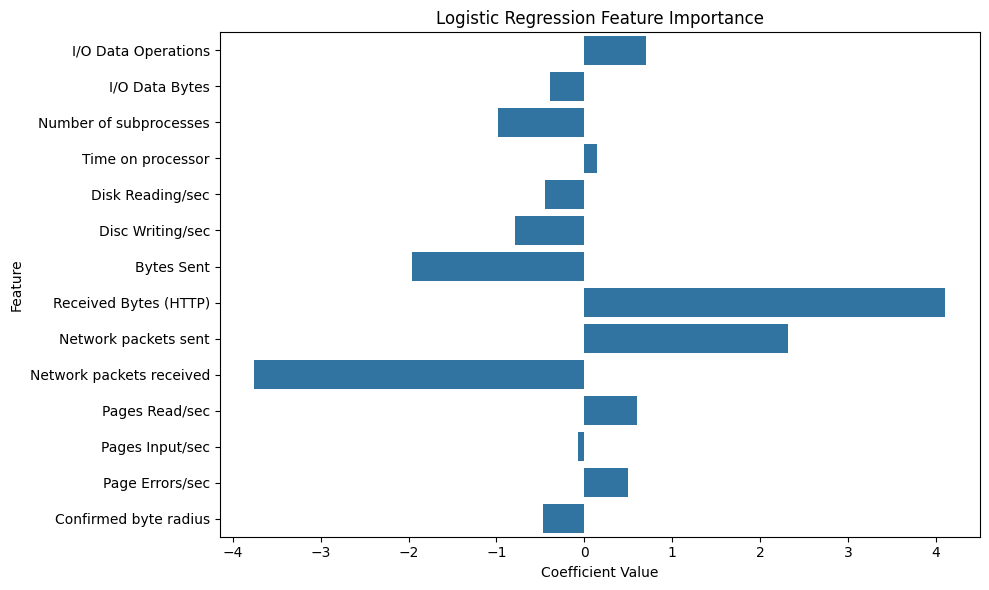

In [27]:
# Logistic Regression Feature Importance (coefficients)
logreg_importance = model.coef_[0]
plt.figure(figsize=(10, 6))
sns.barplot(x=logreg_importance, y=X_train.columns)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Classification report for XGBoost
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1301
           1       0.99      0.98      0.98      1301

    accuracy                           0.98      2602
   macro avg       0.98      0.98      0.98      2602
weighted avg       0.98      0.98      0.98      2602



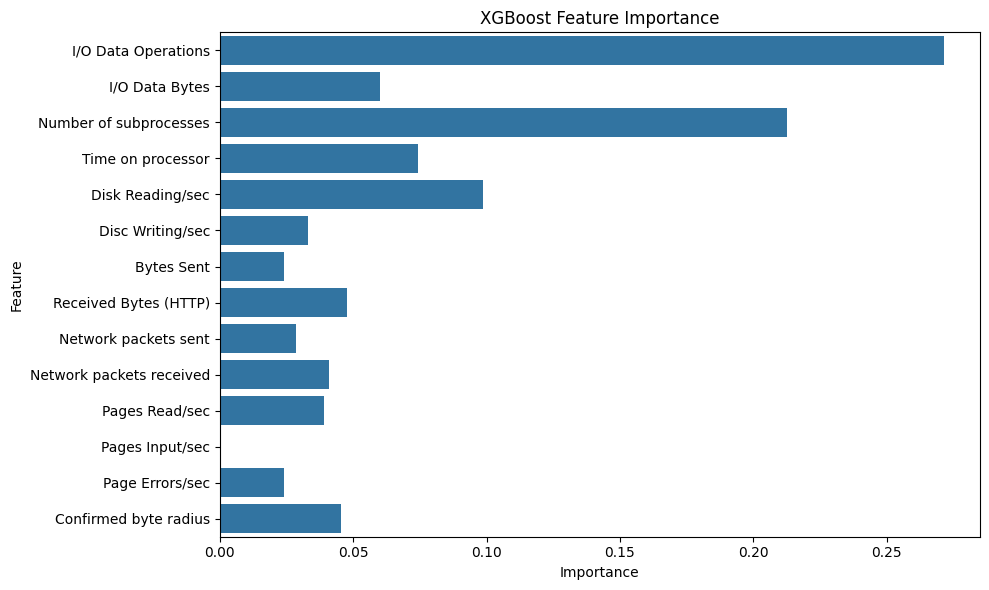

In [88]:
# XGBoost Feature Importance
xgb_importance = xgb.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance, y=X_train.columns)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()